In [1]:
from PIL import Image
import os,glob
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
caltech_dir="C:\Data\screw"
categories=["normal","adnormal"]
nb_classes=len(categories)

In [3]:
image_w=256
image_h=256
pixels=image_w*image_h*3

In [4]:
X=[]
Y=[]

for idx,cat in enumerate(categories):
    label=[0 for i in range(nb_classes)]
    label[idx]=1
    image_dir=caltech_dir+"/"+cat
    files=glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f)
        img=img.convert("RGB")
        img=img.resize((image_w,image_h))
        data=np.asarray(img)
        X.append(data)
        Y.append(label)
        if i%10==0:
            print(i,'\n',data)
            
X=np.array(X)
Y=np.array(Y)
X_train, X_test, y_train, y_test=train_test_split(X, Y,stratify=Y)
xy=(X_train,X_test,y_train,y_test)
np.save("C:\Data\screw\data.npy",xy)
print("ok",len(Y))

0 
 [[[157 144 110]
  [155 142 108]
  [153 140 106]
  ...
  [ 92  83  54]
  [ 91  82  53]
  [ 91  81  54]]

 [[156 143 109]
  [159 146 112]
  [161 146 114]
  ...
  [ 91  81  53]
  [100  90  62]
  [101  90  64]]

 [[157 145 110]
  [153 140 106]
  [157 141 109]
  ...
  [ 89  78  50]
  [ 97  86  58]
  [ 99  87  60]]

 ...

 [[117 103  76]
  [119 105  79]
  [129 117  91]
  ...
  [ 67  56  35]
  [ 65  54  32]
  [ 59  47  28]]

 [[107  93  66]
  [108  94  68]
  [128 116  90]
  ...
  [ 63  52  32]
  [ 62  51  31]
  [ 58  47  27]]

 [[106  92  65]
  [107  93  67]
  [123 111  85]
  ...
  [ 57  46  26]
  [ 60  49  29]
  [ 56  45  25]]]
10 
 [[[ 19  26  32]
  [ 20  27  33]
  [ 21  28  34]
  ...
  [118 123 127]
  [133 138 143]
  [141 146 152]]

 [[ 22  29  35]
  [ 23  30  36]
  [ 20  27  33]
  ...
  [118 123 127]
  [132 137 142]
  [144 149 155]]

 [[ 26  33  39]
  [ 27  34  40]
  [ 23  30  36]
  ...
  [125 130 134]
  [139 144 149]
  [150 155 162]]

 ...

 [[ 13  19  25]
  [ 18  25  31]
  [ 23  29 

c:\Users\Sejong\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [5]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
import numpy as np

In [6]:
categories=["normal","adnormal"]
nb_classes=len(categories)

image_w=64
image_h=64

X_train,X_test,y_train,y_test=np.load("C:\Data\screw\data.npy",allow_pickle=True)

X_train=X_train.astype("float")/256
X_test=X_test.astype("float")/256

print('X_trina shape:',X_train.shape)

X_trina shape: (198, 256, 256, 3)


In [12]:
# 모델 구축하기 --- (※2)
model = Sequential()
model.add(Convolution2D(32, 3, 3, 
    padding='same',
    input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten()) # --- (※3) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])



In [13]:
results=model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=50,verbose=2)
    
# 모델 평가하기--- (※5)
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

Epoch 1/100
4/4 - 1s - loss: 0.7463 - accuracy: 0.5443 - val_loss: 0.6775 - val_accuracy: 0.6750 - 761ms/epoch - 190ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6482 - accuracy: 0.7215 - val_loss: 0.6204 - val_accuracy: 0.6000 - 64ms/epoch - 16ms/step
Epoch 3/100
4/4 - 0s - loss: 0.7133 - accuracy: 0.5570 - val_loss: 0.6107 - val_accuracy: 0.6500 - 63ms/epoch - 16ms/step
Epoch 4/100
4/4 - 0s - loss: 0.5163 - accuracy: 0.7911 - val_loss: 0.4376 - val_accuracy: 0.8250 - 63ms/epoch - 16ms/step
Epoch 5/100
4/4 - 0s - loss: 0.3479 - accuracy: 0.8544 - val_loss: 0.7631 - val_accuracy: 0.6000 - 63ms/epoch - 16ms/step
Epoch 6/100
4/4 - 0s - loss: 0.4042 - accuracy: 0.8101 - val_loss: 0.3571 - val_accuracy: 0.8000 - 64ms/epoch - 16ms/step
Epoch 7/100
4/4 - 0s - loss: 0.2128 - accuracy: 0.9430 - val_loss: 0.1809 - val_accuracy: 0.9000 - 67ms/epoch - 17ms/step
Epoch 8/100
4/4 - 0s - loss: 0.1798 - accuracy: 0.9367 - val_loss: 0.3336 - val_accuracy: 0.8500 - 61ms/epoch - 15ms/step
Epoch 9/100
4/4 - 0s -

In [14]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


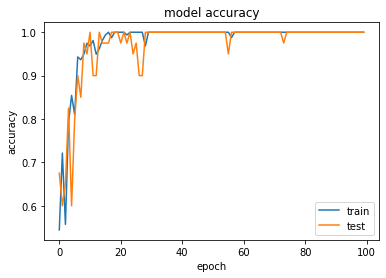

In [15]:

print(results.history.keys())
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower right')
plt.show()

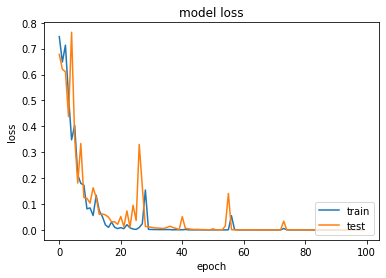

In [16]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')